In [1]:
#import modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/DELL/Downloads/UMCP/PiAnalytics/Freddie_Mac_Dataset/merged.csv",low_memory=False)

In [3]:
data = data[data.First_time_homebuyer_flag != 'First_time_homebuyer_flag']

In [4]:
data.head()

,Unnamed: 0,Credit_score,First_payment_date,First_time_homebuyer_flag,Maturity_Date,Metropolitan_Statistical_Area,Mortgage_Insurance_Percentage,Number_of_units,Occupancy_status,Original_combined_loan_to_value_(CLTV),...,Maintenance_and_Preservation_Costs,Taxes_and_Insurance,Miscellaneous_Expenses,Actual_loss_calculation,Modification_Cost,Status_x,Status_y,Monthly_Reporting_Period_y,Monthly_Reporting_Period_x_y,Class
0,0.0,799,199903,N,202901,37620.0,000,1,O,70,...,NaN,NaN,NaN,NaN,NaN,P,C-C-C-C-C-P,NaN,200301,FALSE
1,1.0,635,200212,N,202904,10420.0,000,1,O,76,...,NaN,NaN,NaN,NaN,NaN,P,C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-...,NaN,201501,FALSE
2,2.0,787,199905,N,202904,12060.0,,1,O,80,...,NaN,NaN,NaN,NaN,NaN,P,C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-...,NaN,200112,FALSE
3,3.0,726,199904,N,202903,28140.0,000,1,O,80,...,NaN,NaN,NaN,NaN,NaN,P,C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-...,NaN,200112,FALSE
4,4.0,748,199905,NaN,202904,17140.0,,1,O,80,...,NaN,NaN,NaN,NaN,NaN,P,C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-...,NaN,200112,FALSE


In [5]:
data = data.convert_objects(convert_numeric=True)

C:\Users\DELL\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [6]:
data.dtypes

Unnamed: 0                                float64
Credit_score                              float64
First_payment_date                          int64
First_time_homebuyer_flag                  object
Maturity_Date                               int64
Metropolitan_Statistical_Area             float64
Mortgage_Insurance_Percentage             float64
Number_of_units                           float64
Occupancy_status                           object
Original_combined_loan_to_value_(CLTV)    float64
Original_debt_to_income_ratio             float64
Original_UPB                                int64
Original_loan_to_value_(LTV)              float64
Original_Interest_Rate                    float64
Channel                                    object
Prepayment_penalty_mortgage_flag           object
Product_type                               object
Property_state                             object
Property_type                              object
Postal_code                               float64


In [9]:
data['First_payment_date'] = data['First_payment_date'].astype(str)
data['Year'] = data.First_payment_date.apply(lambda x: x[:4])

In [12]:
data['First_payment_date'] = data['First_payment_date'].astype(int)
data['Year'] = data['Year'].astype(int)

In [10]:
data[['First_payment_date','Year']]

,First_payment_date,Year
0,199903,1999
1,200212,2002
2,199905,1999
3,199904,1999
4,199905,1999
5,199905,1999
6,199905,1999
7,199905,1999
8,199903,1999
9,199903,1999


In [13]:
bins = [0, 48, 96, 144, 192, 240, 288, 336, 384, 432, 480, 528, 576, 624]
data['Term_Bin'] = pd.cut(data['Original_Loan_Term'], bins)

In [14]:
data[['Original_Loan_Term','Term_Bin']]

,Original_Loan_Term,Term_Bin
0,359,"(336, 384]"
1,317,"(288, 336]"
2,360,"(336, 384]"
3,360,"(336, 384]"
4,360,"(336, 384]"
5,360,"(336, 384]"
6,360,"(336, 384]"
7,360,"(336, 384]"
8,360,"(336, 384]"
9,360,"(336, 384]"


In [25]:
Prepaid_Default_Count = data.groupby(["Status_x", "Year"]).size().reset_index(name="Count")

In [26]:
Prepaid_Default_Count

,Status_x,Year,Count
0,C,1999,774
1,C,2000,535
2,C,2001,940
3,C,2002,1801
4,C,2003,4247
5,C,2004,5186
6,C,2005,6484
7,C,2006,5124
8,C,2007,6022
9,C,2008,5678


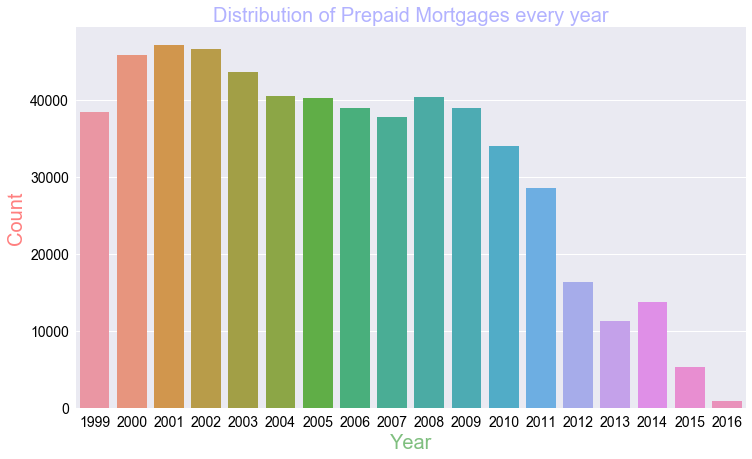

In [28]:
#Barplot
Prepaid_Count = Prepaid_Default_Count[Prepaid_Default_Count['Status_x'] == 'P']
Prepaid_Count[['Year']].apply(lambda x: x.astype('category'))
g = sns.barplot(x="Year",y="Count",data=Prepaid_Count)
# removing ticks upper and right
sns.despine()
# Set the size of the graph from here 
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here 
g.axes.set_title('Distribution of Prepaid Mortgages every year', fontsize=20,color="b",alpha=0.3)
# Set the xlabel of the graph from here 
g.set_xlabel("Year",size = 20,color="g",alpha=0.5)
# Set the ylabel of the graph from here 
g.set_ylabel("Count",size = 20,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here 
g.tick_params(labelsize=14,labelcolor="black")

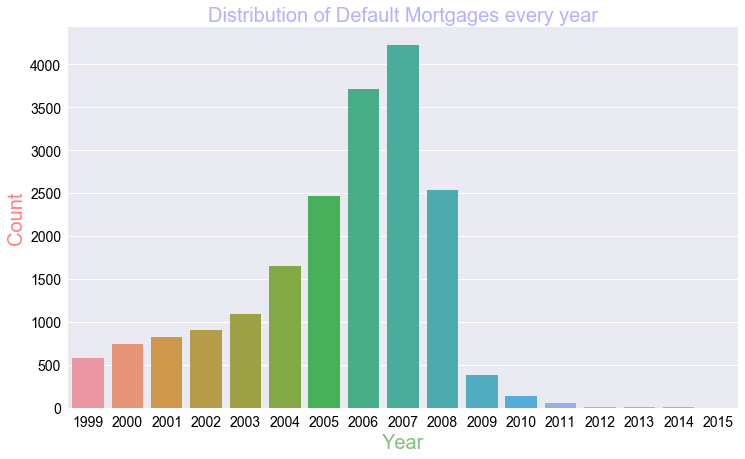

In [29]:
#Barplot
Default_Count = Prepaid_Default_Count[Prepaid_Default_Count['Status_x'] == 'D']
Default_Count[['Year']].apply(lambda x: x.astype('category'))
g = sns.barplot(x="Year",y="Count",data=Default_Count)
# removing ticks upper and right
sns.despine()
# Set the size of the graph from here 
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here 
g.axes.set_title('Distribution of Default Mortgages every year', fontsize=20,color="b",alpha=0.3)
# Set the xlabel of the graph from here 
g.set_xlabel("Year",size = 20,color="g",alpha=0.5)
# Set the ylabel of the graph from here 
g.set_ylabel("Count",size = 20,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here 
g.tick_params(labelsize=14,labelcolor="black")

In [172]:
Status_Year_Term_Count = data.groupby(["Status_x", "Year","Term_Bin"]).size().reset_index(name="Count")

In [173]:
df1 = Status_Year_Term_Count[Status_Year_Term_Count["Status_x"] == 'P']
df1[df1["Year"] == 2006]

,Status_x,Year,Term_Bin,Count
241,P,2006,"(48, 96]",6
242,P,2006,"(96, 144]",362
243,P,2006,"(144, 192]",4035
244,P,2006,"(192, 240]",1574
245,P,2006,"(240, 288]",9
246,P,2006,"(288, 336]",206
247,P,2006,"(336, 384]",32732
248,P,2006,"(432, 480]",13


In [174]:
term = {'Status_x' : ['P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D',
                     'P','P','P','P','P','P','P','P','P','P','P','P','P','D','D','D','D','D','D','D','D','D','D','D','D','D'],
        'Term_Bin': ['(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]',
                    '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]', '(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]'], 
        'col' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
        'Year' : [1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 
                 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
                 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001,
                 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002,
                 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
                 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
                 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
                 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
                 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 
                 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
                 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
                 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
                 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
                 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
                 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
                 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
                 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
                 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016]}

In [175]:
Term_df = pd.DataFrame(term)

In [176]:
Term_df

,Status_x,Term_Bin,Year,col
0,P,"(0, 48]",1999,0
1,P,"(48, 96]",1999,0
2,P,"(96, 144]",1999,0
3,P,"(144, 192]",1999,0
4,P,"(192, 240]",1999,0
5,P,"(240, 288]",1999,0
6,P,"(288, 336]",1999,0
7,P,"(336, 384]",1999,0
8,P,"(384, 432]",1999,0
9,P,"(432, 480]",1999,0


In [180]:
Term_df.dtypes

Status_x    object
Term_Bin    object
Year         int64
col          int64
dtype: object

In [181]:
Status_Year_Term_Count.dtypes

Status_x    object
Year         int64
Term_Bin    object
Count        int64
dtype: object

In [179]:
Term_df['Term_Bin'] = Term_df['Term_Bin'].astype(str)
Status_Year_Term_Count['Term_Bin'] = Status_Year_Term_Count['Term_Bin'].astype(str)

In [254]:
df = pd.merge(Status_Year_Term_Count, Term_df, left_on=['Status_x','Year','Term_Bin'], right_on=['Status_x','Year','Term_Bin'], how='outer')

In [255]:
df1 = df[df["Status_x"] == 'P']
df1[df1["Year"] == 2008]

,Status_x,Year,Term_Bin,Count,col
257,P,2008,"(96, 144]",258.0,0.0
258,P,2008,"(144, 192]",4672.0,0.0
259,P,2008,"(192, 240]",1266.0,0.0
260,P,2008,"(240, 288]",15.0,0.0
261,P,2008,"(288, 336]",292.0,0.0
262,P,2008,"(336, 384]",33863.0,0.0
263,P,2008,"(432, 480]",25.0,0.0
514,P,2008,"(0, 48]",NaN,0.0
515,P,2008,"(48, 96]",NaN,0.0
516,P,2008,"(384, 432]",NaN,0.0


In [256]:
df['Count'].fillna(0, inplace=True)

In [257]:
df2 = df[df["Status_x"] == 'P']
df2[df["Year"] == 2008]

C:\Users\DELL\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Status_x,Year,Term_Bin,Count,col
257,P,2008,"(96, 144]",258.0,0.0
258,P,2008,"(144, 192]",4672.0,0.0
259,P,2008,"(192, 240]",1266.0,0.0
260,P,2008,"(240, 288]",15.0,0.0
261,P,2008,"(288, 336]",292.0,0.0
262,P,2008,"(336, 384]",33863.0,0.0
263,P,2008,"(432, 480]",25.0,0.0
514,P,2008,"(0, 48]",0.0,0.0
515,P,2008,"(48, 96]",0.0,0.0
516,P,2008,"(384, 432]",0.0,0.0


In [258]:
df = df.sort_values(["Status_x","Year","Term_Bin"])

In [259]:
df = df.reset_index(drop=True)

In [260]:
df3 = df[df["Status_x"] == 'P']
df3[df3["Year"] == 2006]

,Status_x,Year,Term_Bin,Count,col
489,P,2006,"(0, 48]",0.0,0.0
490,P,2006,"(144, 192]",4035.0,0.0
491,P,2006,"(192, 240]",1574.0,0.0
492,P,2006,"(240, 288]",9.0,0.0
493,P,2006,"(288, 336]",206.0,0.0
494,P,2006,"(336, 384]",32732.0,0.0
495,P,2006,"(384, 432]",0.0,0.0
496,P,2006,"(432, 480]",13.0,0.0
497,P,2006,"(48, 96]",6.0,0.0
498,P,2006,"(480, 528]",0.0,0.0


In [261]:
df['Term_Bin'].replace(['(0, 48]', '(48, 96]', '(96, 144]', '(144, 192]', '(192, 240]', '(240, 288]', '(288, 336]', '(336, 384]', '(384, 432]', '(432, 480]', '(480, 528]', '(528, 576]', '(576, 624]'],[2,4,6,8,10,12,14,16,18,20,22,24,26],inplace=True)

In [262]:
df4 = df[df["Status_x"] == 'P']
df4[df4["Year"] == 2006]

,Status_x,Year,Term_Bin,Count,col
489,P,2006,2,0.0,0.0
490,P,2006,8,4035.0,0.0
491,P,2006,10,1574.0,0.0
492,P,2006,12,9.0,0.0
493,P,2006,14,206.0,0.0
494,P,2006,16,32732.0,0.0
495,P,2006,18,0.0,0.0
496,P,2006,20,13.0,0.0
497,P,2006,4,6.0,0.0
498,P,2006,22,0.0,0.0


In [263]:
df = df.sort_values(["Status_x","Year","Term_Bin"])

In [264]:
df = df.reset_index(drop=True)

In [265]:
df4 = df[df["Status_x"] == 'P']
df4[df4["Year"] == 2006]

,Status_x,Year,Term_Bin,Count,col
489,P,2006,2,0.0,0.0
490,P,2006,4,6.0,0.0
491,P,2006,6,362.0,0.0
492,P,2006,8,4035.0,0.0
493,P,2006,10,1574.0,0.0
494,P,2006,12,9.0,0.0
495,P,2006,14,206.0,0.0
496,P,2006,16,32732.0,0.0
497,P,2006,18,0.0,0.0
498,P,2006,20,13.0,0.0


In [266]:
df['CumSum'] = df.groupby(by=['Status_x','Year'])['Count'].apply(lambda x: x.cumsum())

In [267]:
df5 = df[df["Status_x"] == 'P']
df5[df5["Year"] == 2006]

,Status_x,Year,Term_Bin,Count,col,CumSum
489,P,2006,2,0.0,0.0,0.0
490,P,2006,4,6.0,0.0,6.0
491,P,2006,6,362.0,0.0,368.0
492,P,2006,8,4035.0,0.0,4403.0
493,P,2006,10,1574.0,0.0,5977.0
494,P,2006,12,9.0,0.0,5986.0
495,P,2006,14,206.0,0.0,6192.0
496,P,2006,16,32732.0,0.0,38924.0
497,P,2006,18,0.0,0.0,38924.0
498,P,2006,20,13.0,0.0,38937.0


In [268]:
df6 = df5.groupby(['Year'], sort=False)['CumSum'].max().reset_index(name="MaxCount")

In [269]:
df6

,Year,MaxCount
0,1999,38422.0
1,2000,45810.0
2,2001,47037.0
3,2002,46536.0
4,2003,43637.0
5,2004,40472.0
6,2005,40220.0
7,2006,38937.0
8,2007,37805.0
9,2008,40391.0


In [270]:
df7 = pd.merge(df5, df6, on='Year', how='left')

In [271]:
df7[df7["Year"] == 2006]

,Status_x,Year,Term_Bin,Count,col,CumSum,MaxCount
91,P,2006,2,0.0,0.0,0.0,38937.0
92,P,2006,4,6.0,0.0,6.0,38937.0
93,P,2006,6,362.0,0.0,368.0,38937.0
94,P,2006,8,4035.0,0.0,4403.0,38937.0
95,P,2006,10,1574.0,0.0,5977.0,38937.0
96,P,2006,12,9.0,0.0,5986.0,38937.0
97,P,2006,14,206.0,0.0,6192.0,38937.0
98,P,2006,16,32732.0,0.0,38924.0,38937.0
99,P,2006,18,0.0,0.0,38924.0,38937.0
100,P,2006,20,13.0,0.0,38937.0,38937.0


In [272]:
df8 = df7[(df7.CumSum != df7.MaxCount) | (df7.Count != 0.0)]

In [273]:
df8[df8["Year"] == 2006]

,Status_x,Year,Term_Bin,Count,col,CumSum,MaxCount
91,P,2006,2,0.0,0.0,0.0,38937.0
92,P,2006,4,6.0,0.0,6.0,38937.0
93,P,2006,6,362.0,0.0,368.0,38937.0
94,P,2006,8,4035.0,0.0,4403.0,38937.0
95,P,2006,10,1574.0,0.0,5977.0,38937.0
96,P,2006,12,9.0,0.0,5986.0,38937.0
97,P,2006,14,206.0,0.0,6192.0,38937.0
98,P,2006,16,32732.0,0.0,38924.0,38937.0
99,P,2006,18,0.0,0.0,38924.0,38937.0
100,P,2006,20,13.0,0.0,38937.0,38937.0


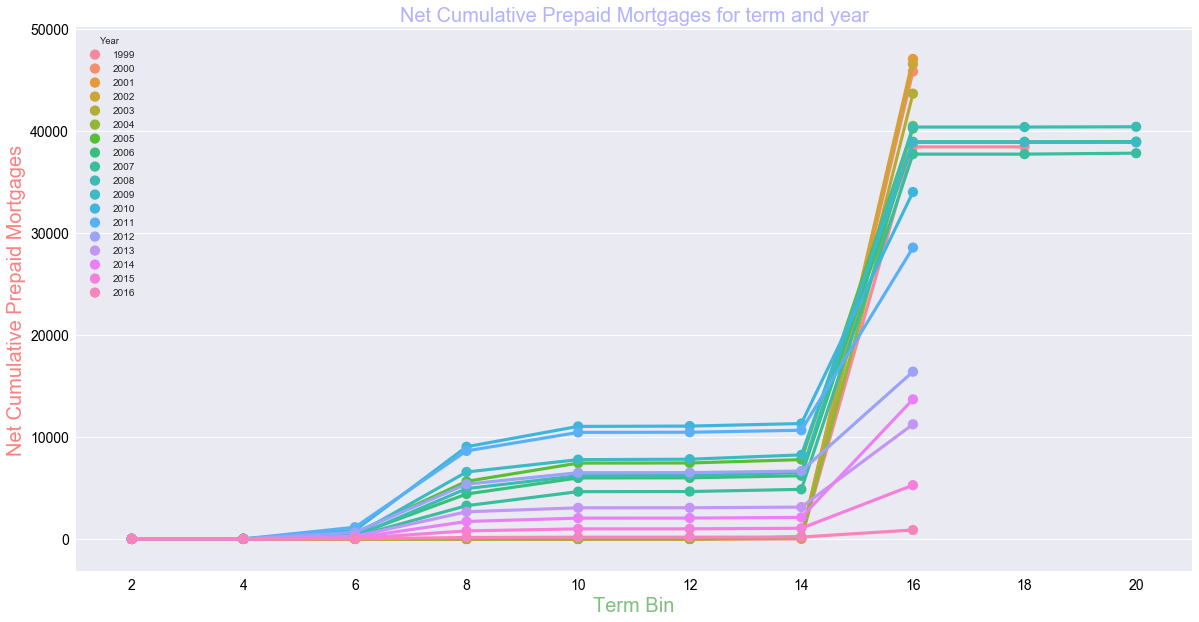

In [274]:
#Net Cumulative graph for Prepaid Mortgages
df8[['Year']].apply(lambda x: x.astype('category'))
df8[['Term_Bin']].apply(lambda x: x.astype('category'))
g = sns.pointplot(x="Term_Bin", y="CumSum", hue="Year", data=df8,join = True)
# removing ticks upper and right
sns.despine()
# Set the size of the graph from here 
g.figure.set_size_inches(20,10)
# Set the Title of the graph from here 
g.axes.set_title('Net Cumulative Prepaid Mortgages for term and year', fontsize=20,color="b",alpha=0.3)
# Set the xlabel of the graph from here 
g.set_xlabel("Term Bin",size = 20,color="g",alpha=0.5)
# Set the ylabel of the graph from here 
g.set_ylabel("Net Cumulative Prepaid Mortgages",size = 20,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here 
g.tick_params(labelsize=14,labelcolor="black")

In [275]:
df9 = df[df["Status_x"] == 'D']
df9[df9["Year"] == 2006]

,Status_x,Year,Term_Bin,Count,col,CumSum
184,D,2006,2,0.0,0.0,0.0
185,D,2006,4,0.0,0.0,0.0
186,D,2006,6,5.0,0.0,5.0
187,D,2006,8,93.0,0.0,98.0
188,D,2006,10,81.0,0.0,179.0
189,D,2006,12,1.0,0.0,180.0
190,D,2006,14,14.0,0.0,194.0
191,D,2006,16,3514.0,0.0,3708.0
192,D,2006,18,0.0,0.0,3708.0
193,D,2006,20,1.0,0.0,3709.0


In [276]:
df10 = df9.groupby(['Year'], sort=False)['CumSum'].max().reset_index(name="MaxCount")

In [277]:
df10

,Year,MaxCount
0,1999,576.0
1,2000,744.0
2,2001,830.0
3,2002,909.0
4,2003,1096.0
5,2004,1648.0
6,2005,2470.0
7,2006,3709.0
8,2007,4219.0
9,2008,2533.0


In [278]:
df11 = pd.merge(df9, df10, on='Year', how='left')

In [279]:
df11[df11["Year"] == 2006]

,Status_x,Year,Term_Bin,Count,col,CumSum,MaxCount
91,D,2006,2,0.0,0.0,0.0,3709.0
92,D,2006,4,0.0,0.0,0.0,3709.0
93,D,2006,6,5.0,0.0,5.0,3709.0
94,D,2006,8,93.0,0.0,98.0,3709.0
95,D,2006,10,81.0,0.0,179.0,3709.0
96,D,2006,12,1.0,0.0,180.0,3709.0
97,D,2006,14,14.0,0.0,194.0,3709.0
98,D,2006,16,3514.0,0.0,3708.0,3709.0
99,D,2006,18,0.0,0.0,3708.0,3709.0
100,D,2006,20,1.0,0.0,3709.0,3709.0


In [280]:
df12 = df11[(df11.CumSum != df11.MaxCount) | (df11.Count != 0.0)]

In [281]:
df12[df12["Year"] == 2006]

,Status_x,Year,Term_Bin,Count,col,CumSum,MaxCount
91,D,2006,2,0.0,0.0,0.0,3709.0
92,D,2006,4,0.0,0.0,0.0,3709.0
93,D,2006,6,5.0,0.0,5.0,3709.0
94,D,2006,8,93.0,0.0,98.0,3709.0
95,D,2006,10,81.0,0.0,179.0,3709.0
96,D,2006,12,1.0,0.0,180.0,3709.0
97,D,2006,14,14.0,0.0,194.0,3709.0
98,D,2006,16,3514.0,0.0,3708.0,3709.0
99,D,2006,18,0.0,0.0,3708.0,3709.0
100,D,2006,20,1.0,0.0,3709.0,3709.0


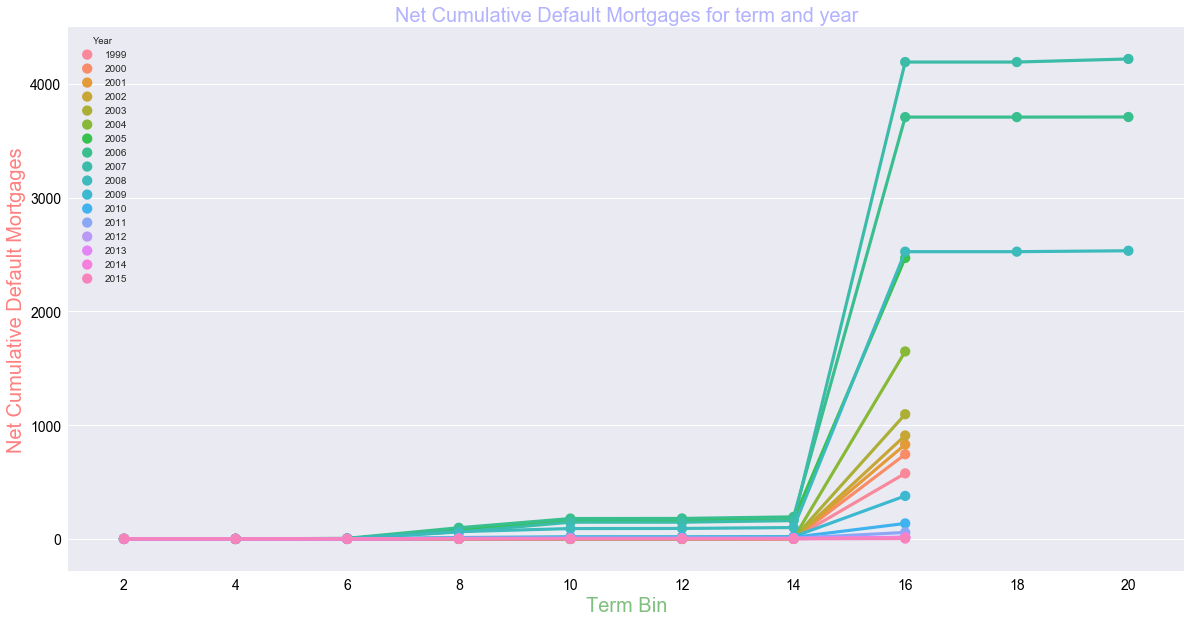

In [282]:
#Net Cumulative graph for Default Mortgages
df12[['Year']].apply(lambda x: x.astype('category'))
df12[['Term_Bin']].apply(lambda x: x.astype('category'))
g = sns.pointplot(x="Term_Bin", y="CumSum", hue="Year", data=df12,join = True)
# removing ticks upper and right
sns.despine()
# Set the size of the graph from here 
g.figure.set_size_inches(20,10)
# Set the Title of the graph from here 
g.axes.set_title('Net Cumulative Default Mortgages for term and year', fontsize=20,color="b",alpha=0.3)
# Set the xlabel of the graph from here 
g.set_xlabel("Term Bin",size = 20,color="g",alpha=0.5)
# Set the ylabel of the graph from here 
g.set_ylabel("Net Cumulative Default Mortgages",size = 20,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here 
g.tick_params(labelsize=14,labelcolor="black")

In [ ]:
#data.where(pd.notnull(data), data.mean(), axis='columns')

In [ ]:
#data.replace(r'\s+', np.nan, regex=True)

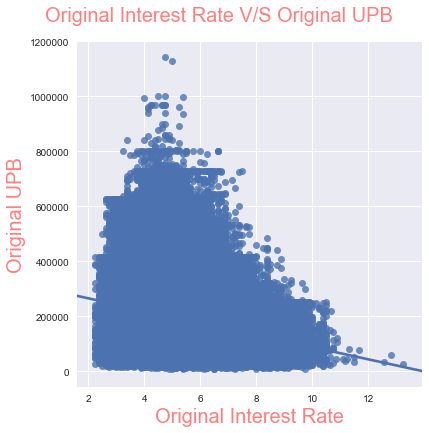

In [283]:
#Scatter plot of Interest Rate V/S UPB
data = data.rename(columns=lambda x: x.replace(' ', '_'))
g = sns.lmplot(x="Original_Interest_Rate", y="Original_UPB",ci=None,data=data, size = 6)
#Title
g.fig.suptitle('Original Interest Rate V/S Original UPB', fontsize=20,color="r",alpha=0.5)
#Adjust title place 
plt.subplots_adjust(top=0.9)
#Format x-axis
g.set_xlabels("Original Interest Rate",size = 20,color="r",alpha=0.5)
#Format Y-axis
g.set_ylabels("Original UPB",size = 20,color="r",alpha=0.5)

In [286]:
#data = data.groupby(data.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

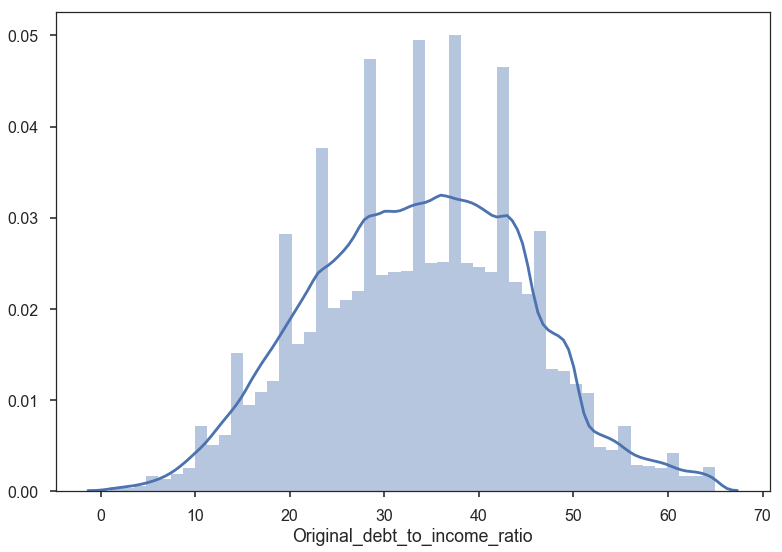

In [288]:
#histogram
data = data.rename(columns=lambda x: x.replace('-', '_'))
data_df = data[~data.Original_debt_to_income_ratio.isnull()]
sns.set_context("poster")
sns.set_style("ticks")
g=sns.distplot(data_df.Original_debt_to_income_ratio)

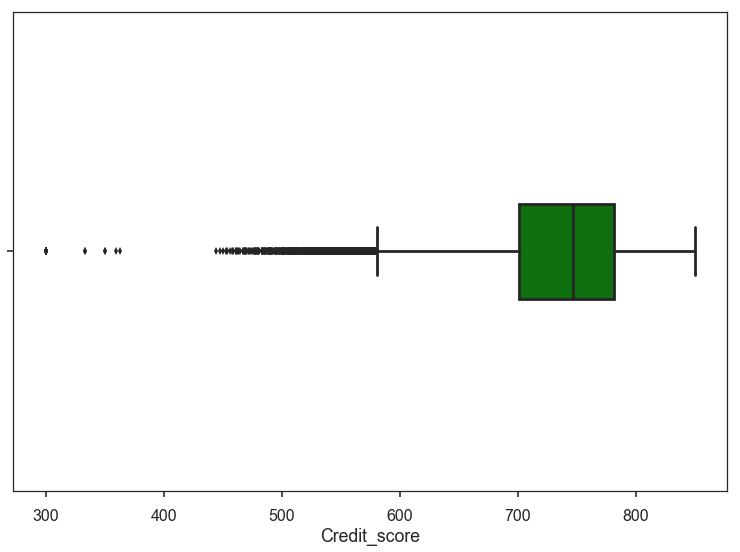

In [289]:
#Boxplot
g = sns.boxplot("Credit_score", data = data, width = .2, color = 'g')

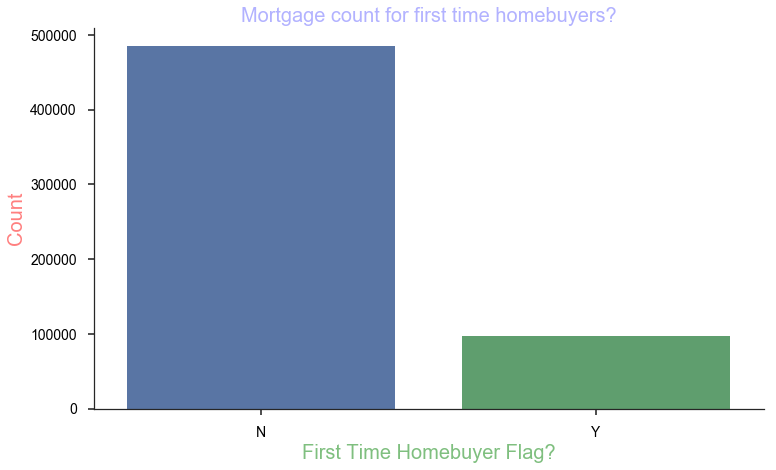

In [290]:
#Barplot
data[['First_time_homebuyer_flag']].apply(lambda x: x.astype('category'))
data = data[data.First_time_homebuyer_flag != 'First_time_homebuyer_flag']
g = sns.countplot(x="First_time_homebuyer_flag", data=data)
# removing ticks upper and right
sns.despine()
# Set the size of the graph from here 
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here 
g.axes.set_title('Mortgage count for first time homebuyers?', fontsize=20,color="b",alpha=0.3)
# Set the xlabel of the graph from here 
g.set_xlabel("First Time Homebuyer Flag?",size = 20,color="g",alpha=0.5)
# Set the ylabel of the graph from here 
g.set_ylabel("Count",size = 20,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here 
g.tick_params(labelsize=14,labelcolor="black")


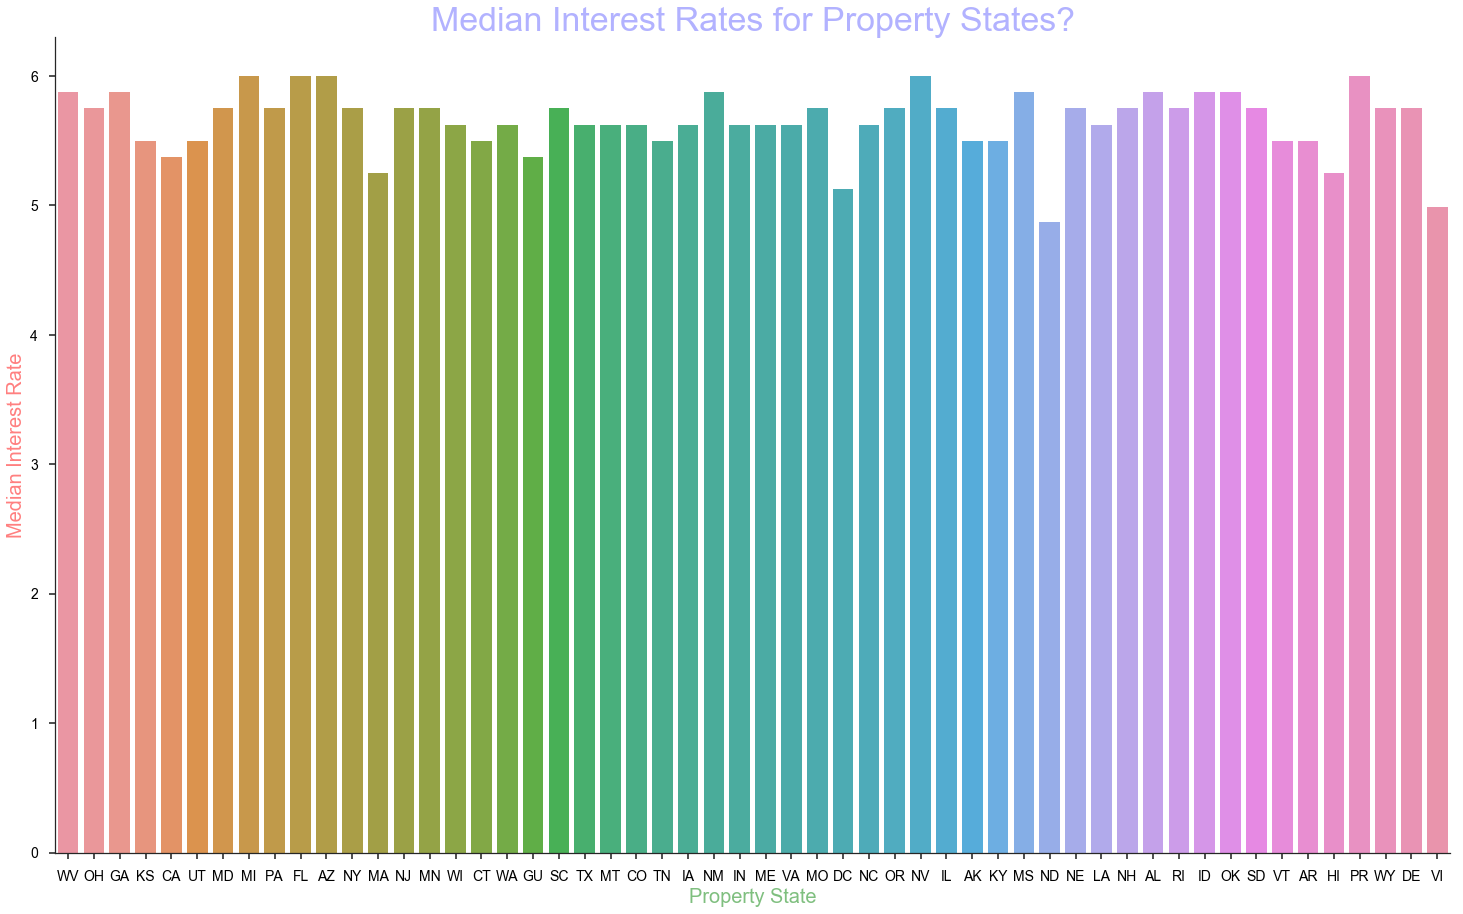

In [291]:
#Barplot
data[['Property_state']].apply(lambda x: x.astype('category'))
g = sns.barplot(x="Property_state", y="Original_Interest_Rate",data=data, ci = None, estimator = np.median)
# removing ticks upper and right
sns.despine()
# Set the size of the graph from here 
g.figure.set_size_inches(25,15)
# Set the Title of the graph from here 
g.axes.set_title('Median Interest Rates for Property States?', fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here 
g.set_xlabel("Property State",size = 20,color="g",alpha=0.5)
# Set the ylabel of the graph from here 
g.set_ylabel("Median Interest Rate",size = 20,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here 
g.tick_params(labelsize=14,labelcolor="black")

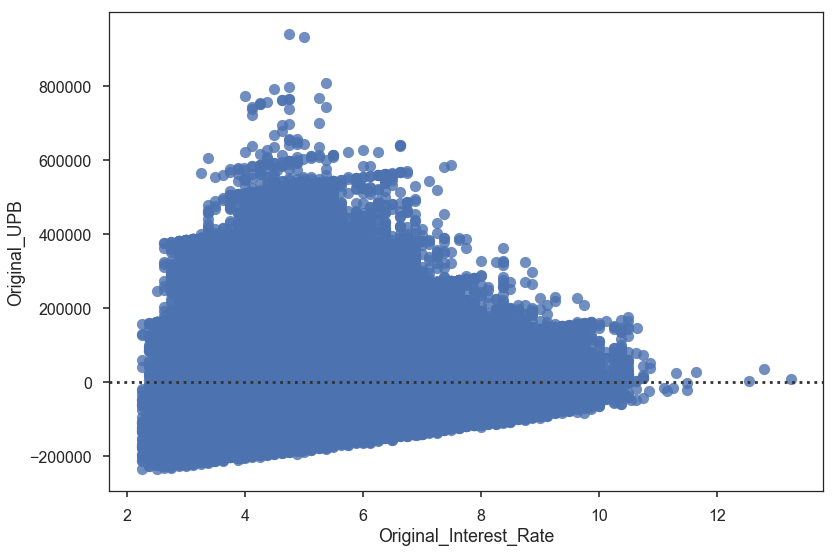

In [292]:
#Residual plot
g = sns.residplot(x="Original_Interest_Rate", y="Original_UPB", data=data)

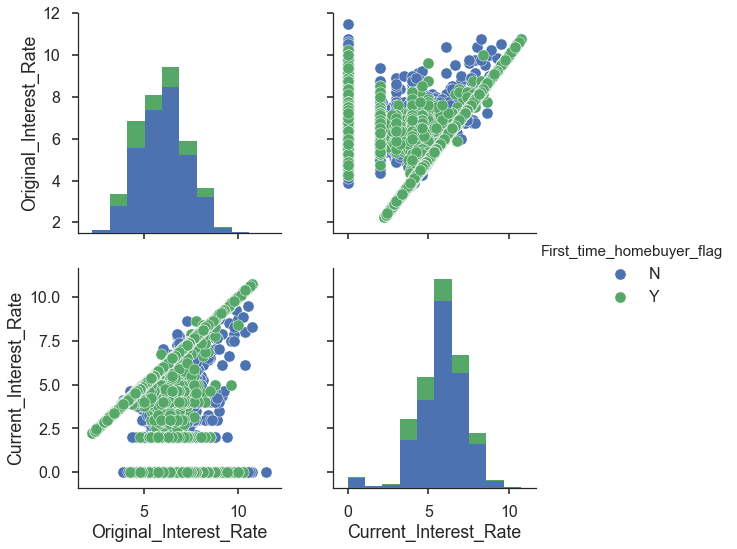

In [296]:
#Pair plot
data = data[data.First_time_homebuyer_flag != 'First time homebuyer flag']
datadf = data[['First_time_homebuyer_flag','Original_Interest_Rate','Current_Interest_Rate']]
DataDF = datadf.dropna()
g = sns.pairplot(DataDF, hue="First_time_homebuyer_flag", vars=["Original_Interest_Rate", "Current_Interest_Rate"], size=4)

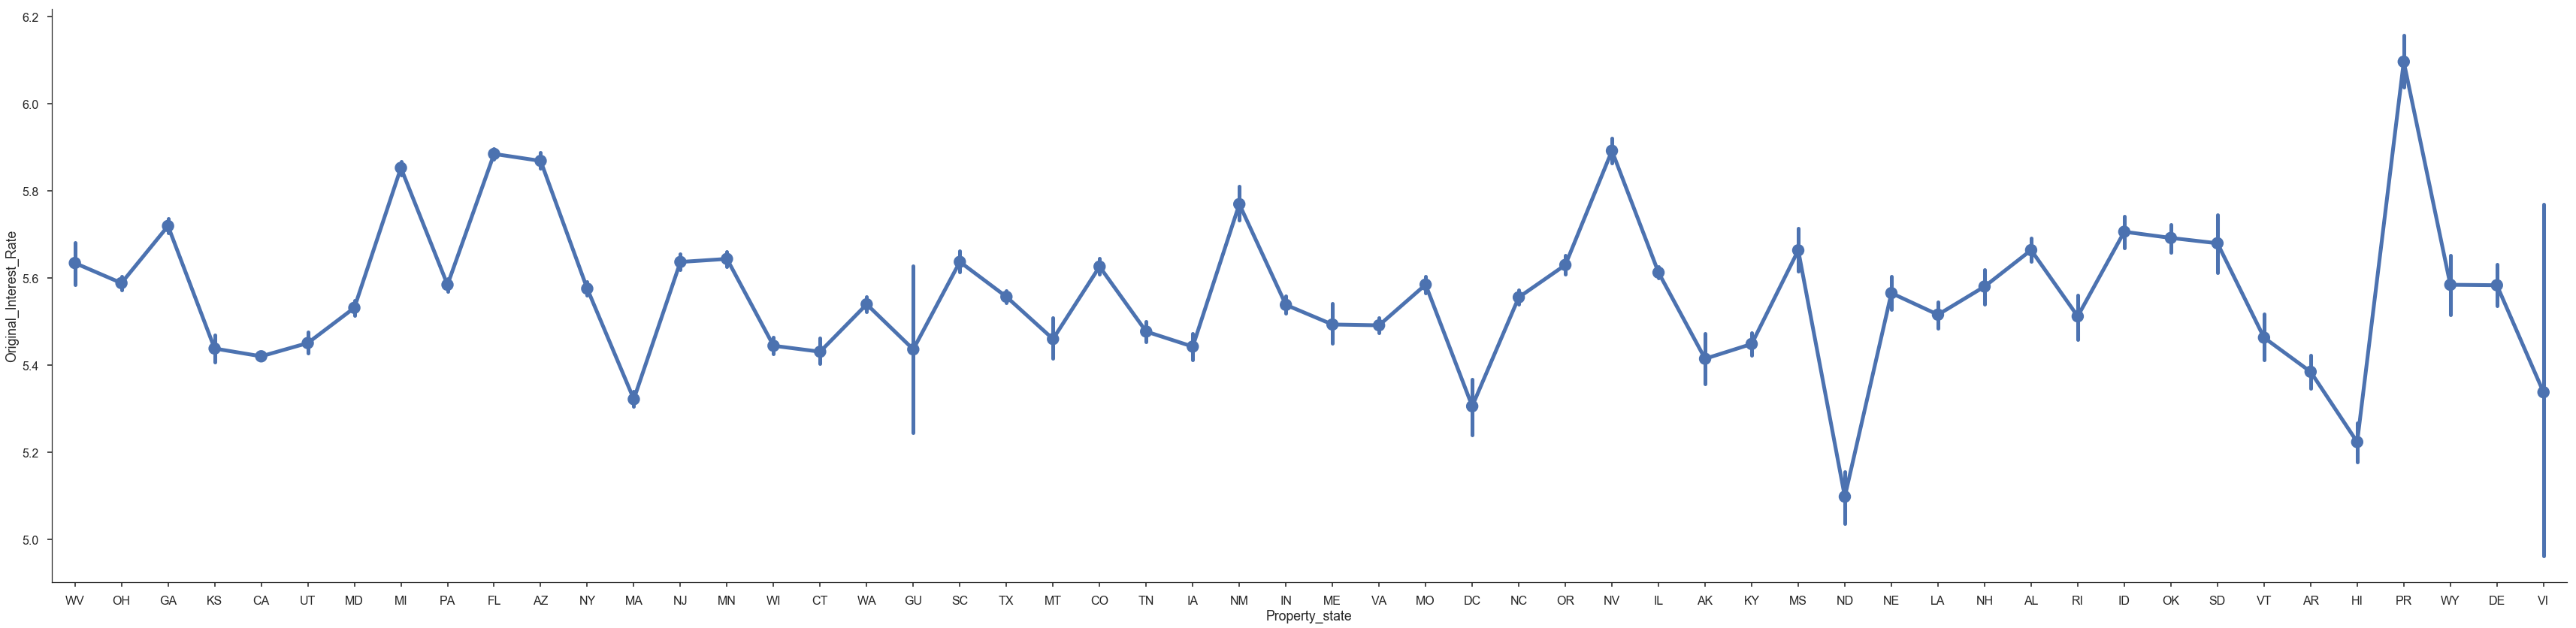

In [297]:
#Factor plot
g = sns.factorplot(x="Property_state", y="Original_Interest_Rate",data=data, size=12,aspect=4)

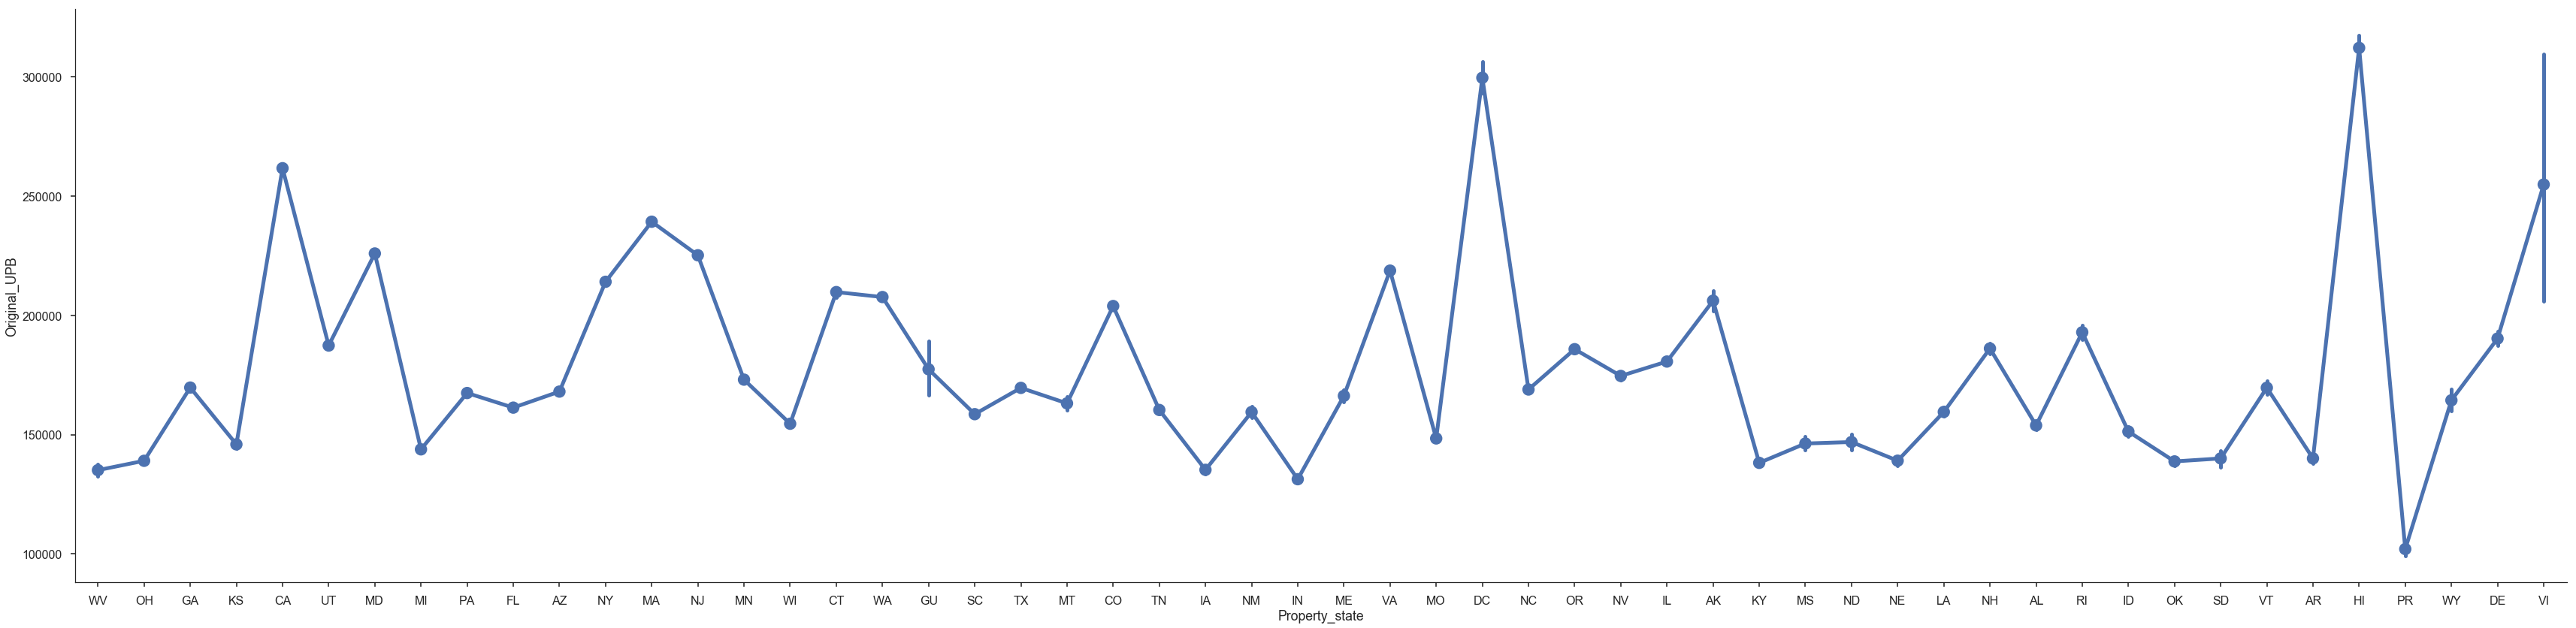

In [298]:
#Factor plot
g = sns.factorplot(x="Property_state", y="Original_UPB",data=data, size=12,aspect=4)

In [299]:
#Import modules for classification models
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
#LOGISTIC REGRESSION

In [311]:
df = data[['Credit_score','First_time_homebuyer_flag','Maturity_Date','Mortgage_Insurance_Percentage','Number_of_units','Original_combined_loan_to_value_(CLTV)','Original_debt_to_income_ratio','Original_UPB','Original_loan_to_value_(LTV)','Original_Interest_Rate','Property_state','Original_Loan_Term','Number_of_borrowers','Class']]
df['First_time_homebuyer_flag'] = pd.factorize(df["First_time_homebuyer_flag"])[0]
df['Property_state'] = pd.factorize(df["Property_state"])[0]
df.Class.value_counts()

C:\Users\DELL\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


FALSE    843073
TRUE      19427
Name: Class, dtype: int64

In [312]:
DataDF = df.dropna()
DataDF.Class.value_counts()

FALSE    821077
TRUE      18882
Name: Class, dtype: int64

In [313]:
X = DataDF[df.columns[1:-2]]
y = pd.factorize(DataDF["Class"])[0]
clf = LogisticRegression()
clf.fit(X, y)
(clf.intercept_, clf.coef_)

(array([  4.11922072e-06]),
 array([[  4.83533172e-04,  -5.13926007e-05,  -1.12155552e-04,
           5.80368000e-05,   1.92338517e-02,   2.92448384e-02,
          -2.59578038e-06,   1.38136462e-02,   5.09433754e-03,
          -1.00560145e-02,   1.06225726e-02]]))

In [314]:
# return probability for each class. R's predict() only returns the probability of the first 
# class, so we do the same.
probs = clf.predict_proba(X)
[prob[0] for prob in probs[0:5]]

[0.97463738691828961,
 0.98548271309639079,
 0.95903283761524249,
 0.99577423986102587,
 0.95053172162146371]

In [321]:
#Prediction of class
ypreds = ["FALSE" if prob[0] > 0.9 else "TRUE" for prob in probs]
ypreds[0:5]

['FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE']

In [322]:
#Confusion matrix
yacts = [str(x) for x in DataDF["Class"].values]
confusion_matrix(yacts, ypreds)

array([[820064,   1013],
       [ 18712,    170]])

In [323]:
accuracy_score(yacts, ypreds)

0.97651671093470038

In [324]:
#Import module for splitting dataset into training and test sets
from sklearn.model_selection import train_test_split
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [326]:
# train Logistic Regression model with training data
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
# test model with test data
ypred = clf2.predict(X_test)
# calculate confusion matrix and accuracy
confusion_matrix(y_test, ypred)

array([[328348,      0],
       [  7636,      0]])

In [69]:
#K-NEAREST-NEIGHBOUR

In [327]:
clf3 = KNeighborsClassifier()
clf3.fit(X_train, y_train)
ypred = clf3.predict(X_test)
confusion_matrix(y_test, ypred)

array([[327914,    434],
       [  7569,     67]])

In [328]:
accuracy_score(y_test, ypred)

0.97618041335301686

In [72]:
#DECISION TREE

In [329]:
#Import module for trees
from sklearn import tree
#Run Classifier
clf4 = tree.DecisionTreeClassifier()
clf4.fit(X_train, y_train)
ypred = clf4.predict(X_test)
confusion_matrix(y_test, ypred)

array([[320024,   8324],
       [  6586,   1050]])

In [330]:
accuracy_score(y_test, ypred)

0.95562288680413354

In [82]:
#NAIVE BAYES

In [331]:
#Import module for Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Run Classifier
clf5 = GaussianNB()
clf5.fit(X_train, y_train)
ypred = clf5.predict(X_test)
confusion_matrix(y_test, ypred)

array([[314850,  13498],
       [  6219,   1417]])

In [332]:
accuracy_score(y_test, ypred)

0.94131565788847082

In [85]:
#NEURAL NETWORKS

In [333]:
#Import module for neural network 
from sklearn.neural_network import MLPClassifier
#Run Classifier
clf6 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 5, 5), random_state=1)
clf6.fit(X_train, y_train)
ypred = clf6.predict(X_test)
confusion_matrix(y_test, ypred)

array([[328348,      0],
       [  7636,      0]])

In [334]:
accuracy_score(y_test, ypred)

0.97727272727272729